In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
with tf.device(device_name):
  print(device_name)

/device:GPU:0


## **Normal MLP Model**

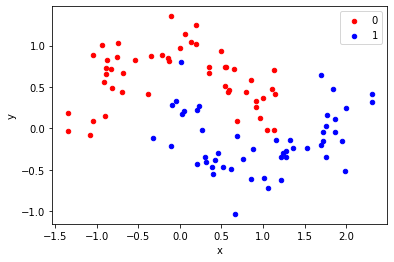

In [6]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [7]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

print(X.shape, y.shape)
print(trainX.shape, testX.shape)
print(trainy.shape, testy.shape)

(100, 2) (100,)
(30, 2) (70, 2)
(30,) (70,)


In [8]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

In [11]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1500      
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# fit model
with tf.device(device_name):
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 49ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3307 - val_accuracy: 0.9286
Epoch 1502/4000
1/1 [==============================] - 0s 36ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3308 - val_accuracy: 0.9286
Epoch 1503/4000
1/1 [==============================] - 0s 54ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3310 - val_accuracy: 0.9286
Epoch 1504/4000
1/1 [==============================] - 0s 48ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3311 - val_accuracy: 0.9286
Epoch 1505/4000
1/1 [==============================] - 0s 40ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 0.9286
Epoch 1506/4000
1/1 [==============================] - 0s 50ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.9286
Epoch 1507/4000
1/1 [==============================] - 0s 35ms/step - loss: 0.0036 - accuracy: 1.0000

In [13]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


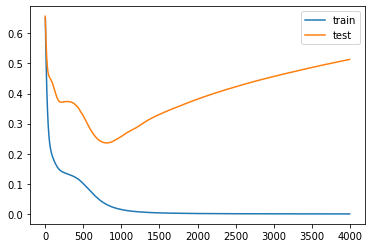

In [14]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## **Overfit MLP With Early Stopping**

In [15]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [17]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

print(X.shape, y.shape)
print(trainX.shape, testX.shape)
print(trainy.shape, testy.shape)

(100, 2) (100,)
(30, 2) (70, 2)
(30,) (70,)


In [18]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [23]:
with tf.device(device_name):
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1, callbacks=[es])

Epoch 1/4000
1/1 [==============================] - 0s 93ms/step - loss: 0.6925 - accuracy: 0.4667 - val_loss: 0.6760 - val_accuracy: 0.6429
Epoch 2/4000
1/1 [==============================] - 0s 56ms/step - loss: 0.6755 - accuracy: 0.6000 - val_loss: 0.6650 - val_accuracy: 0.7714
Epoch 2: early stopping


In [24]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.667, Test: 0.771


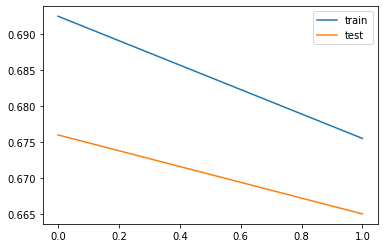

In [25]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## **Overfit MLP With Early Stopping with Patience**

Epoch 927: early stopping
Train: 1.000, Test: 0.943


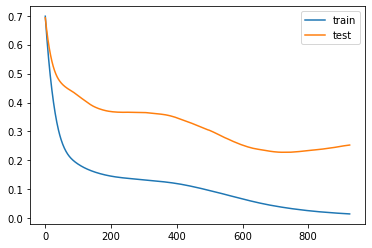

In [26]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
with tf.device(device_name):
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## **Overfit MLP With Early Stopping with Patience and Checkpoints**

In [27]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
with tf.device(device_name):
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: val_accuracy improved from -inf to 0.44286, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.44286 to 0.50000, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.50000 to 0.58571, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.58571 to 0.68571, saving model to best_model.h5

Epoch 5: val_accuracy improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 6: val_accuracy did not improve from 0.71429

Epoch 7: val_accuracy did not improve from 0.71429

Epoch 8: val_accuracy did not improve from 0.71429

Epoch 9: val_accuracy did not improve from 0.71429

Epoch 10: val_accuracy did not improve from 0.71429

Epoch 11: val_accuracy did not improve from 0.71429

Epoch 12: val_accuracy did not improve from 0.71429

Epoch 13: val_accuracy did not improve from 0.71429

Epoch 14: val_accuracy did not improve from 0.71429

Epoch 15: val_accuracy did not improve from 0.71429

Epoch 16: val_accuracy did not improve fr